Formula1_EDA/ML


HYPOTHESIS

• Primary Hypothesis: The development and composition of a constructor team have a high impact on a Formula1 team's 
chances of winning races.

• Secondary Hypotheses:
1. The efficiency and effectiveness of pit stops are critical 
factors that significantly impact the driver's performance 
during a race.
2. The diversity of the team (skills, experience, backgrounds) 
positively influences team performance and race outcomes.

Datasets used: constructor, constructor_standings, drivers, driver_standings, pit_stops, races, results

In [1]:
#packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px

%matplotlib inline


In [2]:
#paths to files

file_paths = {
    'circuits': '/Users/yummy/Desktop/Clicked/archive (3)/circuits.csv',
    'constructor_results': '/Users/yummy/Desktop/Clicked/archive (3)/constructor_results.csv',
    'constructor_standings': '/Users/yummy/Desktop/Clicked/archive (3)/constructor_standings.csv',
    'constructors': '/Users/yummy/Desktop/Clicked/archive (3)/constructors.csv',
    'driver_standings': '/Users/yummy/Desktop/Clicked/archive (3)/driver_standings.csv',
    'races': '/Users/yummy/Desktop/Clicked/archive (3)/races.csv',
    'qualifying': '/Users/yummy/Desktop/Clicked/archive (3)/qualifying.csv',
    'pit_stops': '/Users/yummy/Desktop/Clicked/archive (3)/pit_stops.csv',
    'lap_times': '/Users/yummy/Desktop/Clicked/archive (3)/lap_times.csv',
    'drivers': '/Users/yummy/Desktop/Clicked/archive (3)/drivers.csv',
    'status': '/Users/yummy/Desktop/Clicked/archive (3)/status.csv',
    'sprint_results': '/Users/yummy/Desktop/Clicked/archive (3)/sprint_results.csv',
    'seasons': '/Users/yummy/Desktop/Clicked/archive (3)/seasons.csv',
    'results': '/Users/yummy/Desktop/Clicked/archive (3)/results.csv'
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display the dictionary keys to confirm
dataframes.keys()


dict_keys(['circuits', 'constructor_results', 'constructor_standings', 'constructors', 'driver_standings', 'races', 'qualifying', 'pit_stops', 'lap_times', 'drivers', 'status', 'sprint_results', 'seasons', 'results'])

Inspect datasets

In [3]:
# inspect datasets
def inspect_data(dataframes):
    inspection_results = {}
    for name, df in dataframes.items():
        inspection_results[name] = {
            'shape': df.shape,
            'missing_values': df.isnull().sum(),
            #'dtypes': df.dtypes,
            #'head': df.head()
        }
    return inspection_results

# Inspect data
result = inspect_data(dataframes)
result

{'circuits': {'shape': (77, 9),
  'missing_values': circuitId     0
  circuitRef    0
  name          0
  location      0
  country       0
  lat           0
  lng           0
  alt           0
  url           0
  dtype: int64},
 'constructor_results': {'shape': (12290, 5),
  'missing_values': constructorResultsId    0
  raceId                  0
  constructorId           0
  points                  0
  status                  0
  dtype: int64},
 'constructor_standings': {'shape': (13051, 7),
  'missing_values': constructorStandingsId    0
  raceId                    0
  constructorId             0
  points                    0
  position                  0
  positionText              0
  wins                      0
  dtype: int64},
 'constructors': {'shape': (211, 5),
  'missing_values': constructorId     0
  constructorRef    0
  name              0
  nationality       0
  url               0
  dtype: int64},
 'driver_standings': {'shape': (34124, 7),
  'missing_values': driverStandi

Summarize each dataset to have an overview of data

In [4]:
# summarize each dataset
def summarize_dataset(dataframes):
    summaries = {}
    for name, df in dataframes.items():
        print(f"Dataset: {name}\n")
        
        # Basic table info
        print("Basic Info:\n")
        df_info = df.info()
        
        ## Number of Unique Values
        # print("\nUnique Values:\n")
        # unique_values = df.nunique()
        # print(unique_values)
        
        # Summary Statistics
        print("\nSummary Statistics:\n")
        summary_stats = df.describe(include='all')
        print(summary_stats)

        ###
        print("\n" + "="*50 + "\n")
        
        # Store summaries in a dict
        summaries[name] = {
            'info': df_info,
            #'unique_values': unique_values,
            'summary_statistics': summary_stats
        }
        
    return summaries

# Summarize all datasets
summarized_data = summarize_dataset(dataframes)


Dataset: circuits

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB

Summary Statistics:

        circuitId   circuitRef                            name   location  \
count   77.000000           77                              77         77   
unique        NaN           77                              77         75   
top           NaN  albert_park  Albert Park Grand Prix Circuit  Barcelona   
freq          NaN      

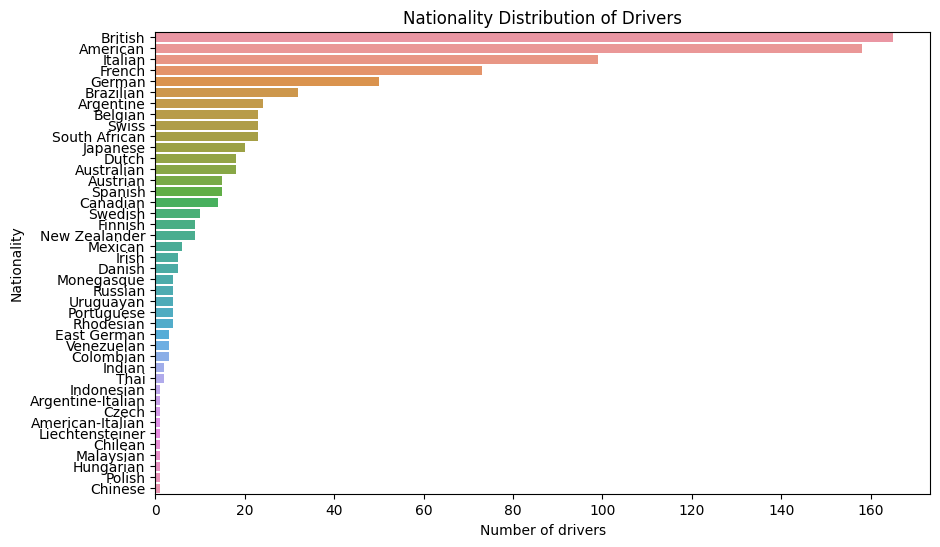

In [5]:
# Driver nationality distribution

drivers = dataframes['drivers']

nationality_distribution = drivers['nationality'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_distribution.values, y=nationality_distribution.index)
plt.title('Nationality Distribution of Drivers')
plt.xlabel('Number of drivers')
plt.ylabel('Nationality')
plt.show()


Find top 10 drivers (mean) by total points fpor each driver

Top 10 Drivers by Total Points:

   driverId   forename     surname  points
0         1      Lewis    Hamilton  4540.5
1        20  Sebastian      Vettel  3098.0
2       830        Max  Verstappen  2275.5
3         4   Fernando      Alonso  2203.0
4         8       Kimi   Räikkönen  1873.0
5       822   Valtteri      Bottas  1783.0
6         3       Nico     Rosberg  1594.5
7        30    Michael  Schumacher  1566.0
8       815     Sergio       Pérez  1361.0
9       817     Daniel   Ricciardo  1307.0


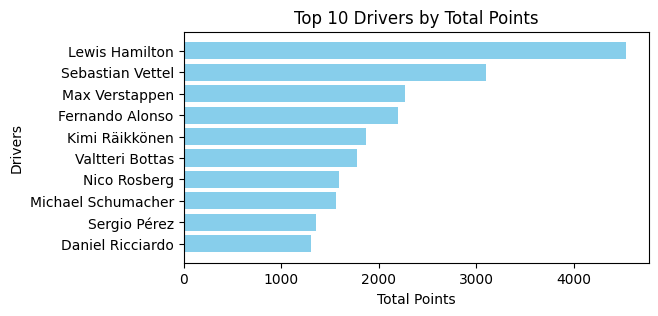

In [6]:
#Using results/drivers dataset
#Aggregate total points for each driver

driver_points = dataframes['results'].groupby('driverId')['points'].sum().reset_index()

# Sort drivers by total points in descending order
driver_points_sorted = driver_points.sort_values(by='points', ascending=False)

#top 10 drivers
top_10_drivers = driver_points_sorted.head(10)

# Merge with drivers dataset to get driver details
top_10_drivers_details = top_10_drivers.merge(dataframes['drivers'], on='driverId')

# Display the merged DataFrame
print("Top 10 Drivers by Total Points:\n")
print(top_10_drivers_details[['driverId', 'forename', 'surname', 'points']])

top_10_drivers_details.head()

driver_names = top_10_drivers_details['forename'] + ' ' + top_10_drivers_details['surname']
driver_points = top_10_drivers_details['points']

# Plotting
plt.figure(figsize=(6, 3))
plt.barh(driver_names, driver_points, color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Drivers')
plt.title('Top 10 Drivers by Total Points')
plt.gca().invert_yaxis()
plt.show()

Drver performance by constructor
- Aggregate Data: Calculate the total points scored by each driver per constructor.
- Merge aggregated data with the drivers and constructors datasets for names
- Filter Top 10 Drivers by total points
- Plot barchart to show the points scored by drivers for each constructor

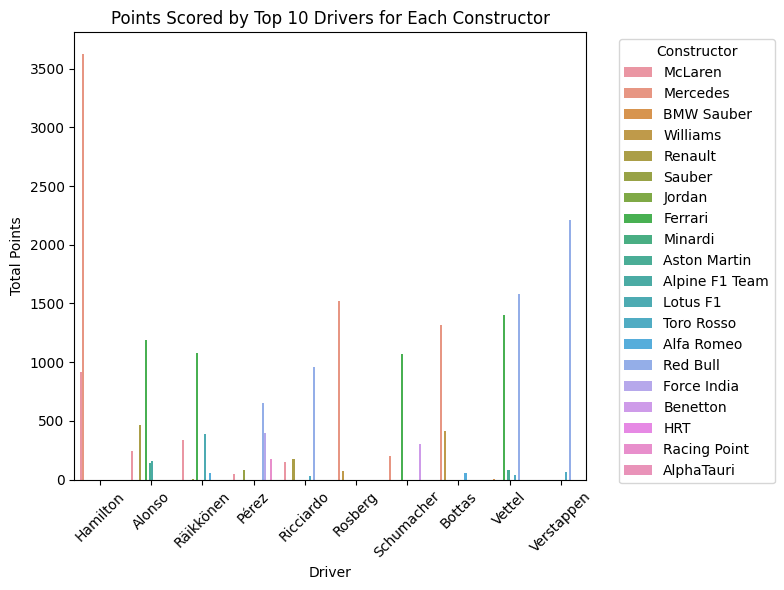

In [7]:
results = dataframes['results']
constructors = dataframes['constructors']

# Aggregate points for each driver and constructor
driver_constructor_points = results.groupby(['driverId', 'constructorId'])['points'].sum().reset_index()

# Merge with drivers dataset to get driver names
driver_constructor_points = driver_constructor_points.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Merge with constructors dataset to get constructor names
driver_constructor_points = driver_constructor_points.merge(constructors[['constructorId', 'name']], on='constructorId')

# Determine the top 10 drivers by total points
top_10_drivers = driver_constructor_points.groupby('driverId')['points'].sum().reset_index().sort_values(by='points', ascending=False).head(10)

# Filter results for the top 10 drivers
top_10_driver_constructor_points = driver_constructor_points[driver_constructor_points['driverId'].isin(top_10_drivers['driverId'])]

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x='surname', y='points', hue='name', data=top_10_driver_constructor_points)
plt.title('Points Scored by Top 10 Drivers for Each Constructor')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 drivers by races over seasons
- Filter results for top 10 drivers
- Merge with races to get the years of races
- Find sum of points for each season
- Merge with drivers dataset to get the driver names/pivot for plotting
- plot graph

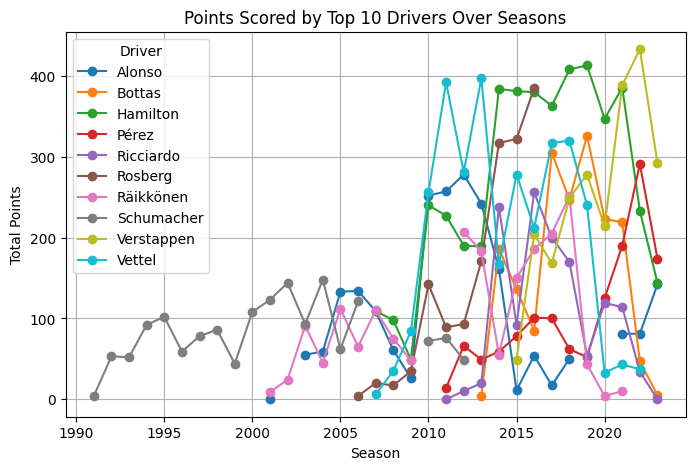

In [8]:
# driverId in a list
top_10_driver_ids = top_10_drivers['driverId'].tolist()

# Filter results for the top 10 drivers
top_10_results = dataframes['results'][dataframes['results']['driverId'].isin(top_10_driver_ids)]

# Merge with races to get the year
top_10_results = top_10_results.merge(dataframes['races'][['raceId', 'year']], on='raceId')

# Aggregate points per season for each driver
driver_season_points = top_10_results.groupby(['driverId', 'year'])['points'].sum().reset_index()

# Merge with drivers to get driver names
driver_season_points = driver_season_points.merge(dataframes['drivers'][['driverId', 'forename', 'surname']], on='driverId')

# Create a pivot table for plotting
driver_season_pivot = driver_season_points.pivot(index='year', columns='surname', values='points')

driver_season_pivot.head()


# Plot data
plt.figure(figsize=(8, 5))
driver_season_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Points Scored by Top 10 Drivers Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Driver')
plt.grid(True)
plt.show()

Constructor team performance over seasons
- Calculate total points per season for each constructor (aggreagate)
- Merge/combine aggregated data with the constructors dataset for team names.
- Filter Top 10 Teams by total points/plot line chart to show the points scored by these teams over the seasons.

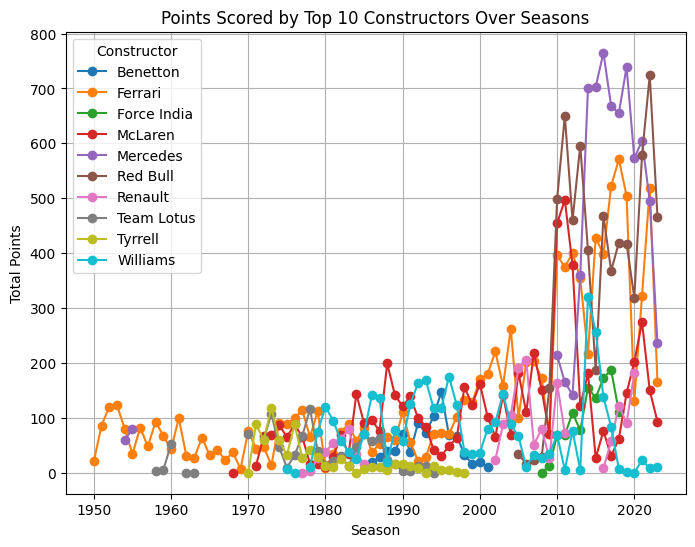

In [9]:
races = dataframes['races']

# Aggregate points per season for each constructor
constructor_season_points = results.merge(races[['raceId', 'year']], on='raceId').groupby(['constructorId', 'year'])['points'].sum().reset_index()

# Merge with constructors dataset to get constructor names
constructor_season_points = constructor_season_points.merge(constructors[['constructorId', 'name']], on='constructorId')

# Determine the top 10 constructors by total points
top_10_constructors = constructor_season_points.groupby('constructorId')['points'].sum().reset_index().sort_values(by='points', ascending=False).head(10)

# Filter results for the top 10 constructors
top_10_constructor_results = constructor_season_points[constructor_season_points['constructorId'].isin(top_10_constructors['constructorId'])]

# Create a pivot table for plotting
constructor_season_pivot = top_10_constructor_results.pivot(index='year', columns='name', values='points')

# Plot the data
plt.figure(figsize=(8, 6))
constructor_season_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Points Scored by Top 10 Constructors Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Constructor')
plt.grid(True)
plt.show()

Top 5 driver's win rates
- Total number of races and wins for each driver
- compute win rate for each driver
- select top 5 drivers by total wins
- bar plot to show drivers

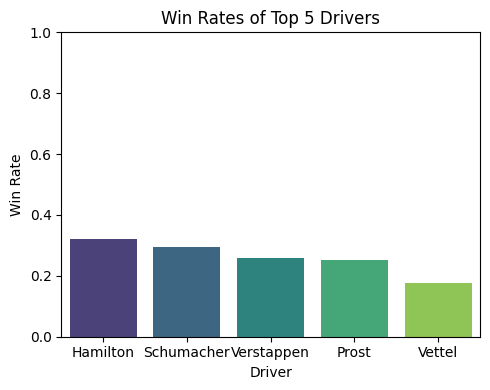

driverId  total_races  total_wins  win_rate   forename     surname
0         1          322       103.0  0.319876      Lewis    Hamilton
1        30          308        91.0  0.295455    Michael  Schumacher
4       830          175        45.0  0.257143        Max  Verstappen
3       117          202        51.0  0.252475      Alain       Prost
2        20          300        53.0  0.176667  Sebastian      Vettel

In [10]:
# Calculate the total number of races for each driver
driver_races = results.groupby('driverId')['raceId'].count().reset_index()
driver_races.rename(columns={'raceId': 'total_races'}, inplace=True)

# Calculate the total number of wins for each driver
driver_wins = results[results['positionOrder'] == 1].groupby('driverId')['raceId'].count().reset_index()
driver_wins.rename(columns={'raceId': 'total_wins'}, inplace=True)

# Merge total races and total wins dataframes
driver_performance = driver_races.merge(driver_wins, on='driverId', how='left')
driver_performance['total_wins'].fillna(0, inplace=True)  # Fill NaNs with 0 for drivers with no wins

# Calculate win rate
driver_performance['win_rate'] = driver_performance['total_wins'] / driver_performance['total_races']

# Determine the top 5 drivers by total wins
top_5_drivers = driver_performance.sort_values(by='total_wins', ascending=False).head(5)

# Merge with drivers dataset to get driver names
top_5_drivers = top_5_drivers.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Sort by win rate in descending order for plotting
top_5_drivers = top_5_drivers.sort_values(by='win_rate', ascending=False)

# Plot the data
plt.figure(figsize=(5, 4))
sns.barplot(x='surname', y='win_rate', data=top_5_drivers, palette='viridis')
plt.title('Win Rates of Top 5 Drivers')
plt.xlabel('Driver')
plt.ylabel('Win Rate')
plt.ylim(0, 1)  # Win rate ranges from 0 to 1
plt.tight_layout()
plt.show()

top_5_drivers.head()

Wins by constructor

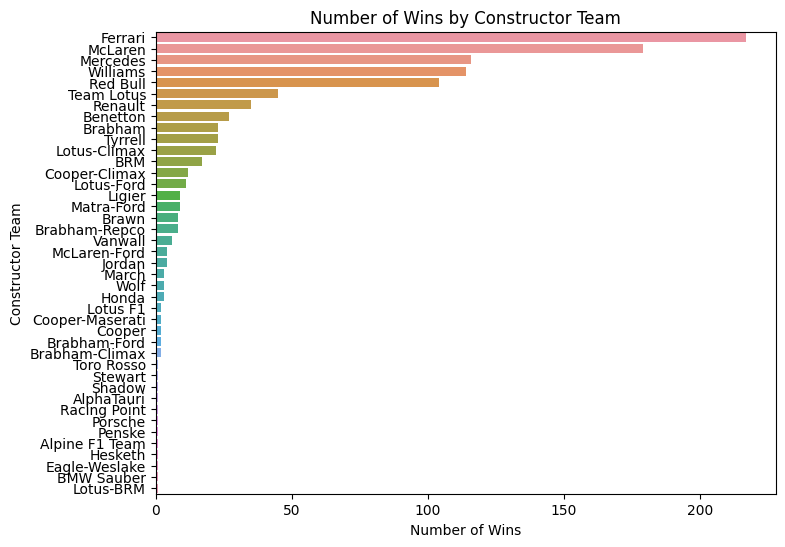

In [11]:
# Load datasets

constructors = dataframes['constructors']
constructor_standings = dataframes['constructor_standings']
results = dataframes['results']
races = dataframes['races']

# Merge results with constructors to get team names
results_with_teams = results.merge(constructors, on='constructorId')

# Merge with constructor standings to get standings data
results_with_standings = results_with_teams.merge(constructor_standings, on=['raceId', 'constructorId'], suffixes=('', '_standing'))

# Merge with races to get race information
team_standings_result = results_with_standings.merge(races, on='raceId')

#team_standings_result.head()

# Calculate number of wins by team
wins_by_team = team_standings_result[team_standings_result['positionOrder'] == 1].groupby('name_x').size().reset_index(name='wins')
wins_by_team = wins_by_team.sort_values(by='wins', ascending=False)

# Plot wins by team
plt.figure(figsize=(8, 6))
sns.barplot(x='wins', y='name_x', data=wins_by_team)
plt.title('Number of Wins by Constructor Team')
plt.xlabel('Number of Wins')
plt.ylabel('Constructor Team')
plt.show()



Driver performance by age
- Aggregate total points scored by each driver per season
- Merge aggregated data with drivers dataset to include driver birth dates
- **Compute the age of each driver
- Analyze Performance by Age: group drivers by age and analyze their performance.
- Create plots to visualize the relationship between age and performance

In [ ]:
# Aggregate points per season for each driver
driver_season_points = results.merge(races[['raceId', 'year']], on='raceId').groupby(['driverId', 'year'])['points'].sum().reset_index()

# Merge with drivers dataset to get driver details
driver_season_points = driver_season_points.merge(drivers[['driverId', 'dob']], on='driverId')

# Calculate the age of each driver during each season
driver_season_points['dob'] = pd.to_datetime(driver_season_points['dob'])
driver_season_points['age'] = driver_season_points['year'] - driver_season_points['dob'].dt.year

# Group by age and calculate the mean points scored
age_performance = driver_season_points.groupby('age')['points'].mean().reset_index()

# Plot the data
plt.figure(figsize=(6, 4))
sns.barplot(x='age', y='points', data=age_performance, palette='viridis')
plt.title('Average Points Scored by Drivers at Different Ages')
plt.xlabel('Age')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Correlation matrices

In [ ]:

# # Load dataframes from the dictionary
# results = dataframes['results']

# # Select relevant numeric columns and handle missing values
# results_relevant = results[['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'statusId']]
# results_relevant = results_relevant.fillna(0)

# # Calculate the correlation matrix
# correlation_matrix = results_relevant.corr()

# # Plot function
# def plot_correlation_matrix(corr_matrix, title):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#     plt.title(title)
#     plt.show()

# # Plot correlation matrix for Results
# plot_correlation_matrix(correlation_matrix, "Correlation Matrix for Results")



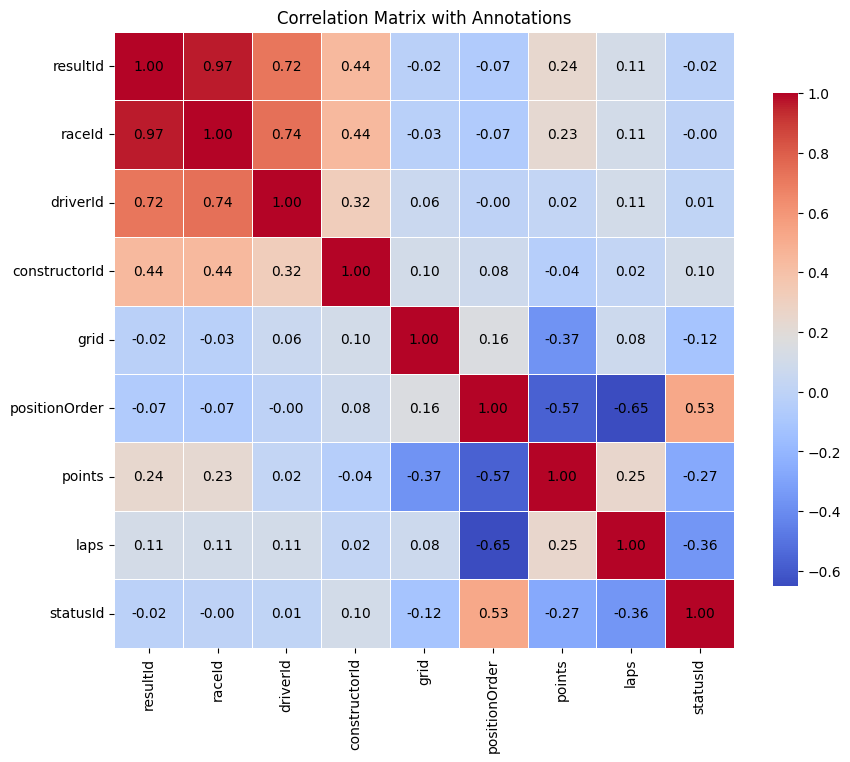

In [29]:

# extract dataframes from dict
results = dataframes['results']
constructor_results = dataframes['constructor_results']
driver_standings = dataframes['driver_standings']

#numeric columns
results_numeric = results.select_dtypes(include=['float64', 'int64'])
constructor_results_numeric = constructor_results.select_dtypes(include=['float64', 'int64'])
driver_standings_numeric = driver_standings.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = results_numeric.corr()
corr = constructor_results_numeric.corr()
corr = driver_standings_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})

# Add the correlation values manually
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j+0.5, i+0.5, f'{corr.iloc[i, j]:.2f}',
                ha='center', va='center', color='black')

# Set the title
plt.title('Correlation Matrix for results')
plt.show()

# plot_correlation_matrix(results_numeric, "Correlation Matrix for Results")
# plot_correlation_matrix(constructor_results_numeric, "Correlation Matrix for Constructor Results")
#plot_correlation_matrix(driver_standings_numeric, "Correlation Matrix for Driver standings")

#----
# Calculate and plot the correlation matrix for Results
# plt.figure(figsize=(8, 4))
# corr = results_numeric.corr()
# sns.heatmap(corr, annot=True,  # Turn off default annotation
#             vmin=-1, vmax=1,  # Set value range for colormap
#             fmt=".1f",  # Format string to display one decimal place
#             cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix for Results")
# plt.show()

# # Calculate and plot the correlation matrix for Results
# plt.figure(figsize=(8, 4))
# sns.heatmap(results_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix for Results")
# plt.show()

# # Calculate and plot the correlation matrix for Constructor Results
# plt.figure(figsize=(8, 4))
# sns.heatmap(constructor_results_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix for Constructor Results")
# plt.show()

# # Calculate and plot the correlation matrix for Driver Standings
# plt.figure(figsize=(8, 4))
# sns.heatmap(driver_standings_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix for Driver Standings")
# plt.show()


# Function to plot correlation matrix 
# def plot_correlation_matrix(dataframes, title):
#     plt.figure(figsize=(8, 4))
#     sns.heatmap(dataframes.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
#     plt.title(title)
#     plt.show()

# # Plot correlation matrix for Results
# plot_correlation_matrix(results_numeric, "Correlation Matrix for Results")

# # Plot correlation matrix for Constructor Results
# plot_correlation_matrix(constructor_results_numeric, "Correlation Matrix for Constructor Results")

# # Plot correlation matrix for Driver Standings
# plot_correlation_matrix(driver_standings_numeric, "Correlation Matrix for Driver Standings")

# -------------
# @title
# Select numerical columns for the correlation matrix
#numerical_columns = results.select_dtypes(include=['float64', 'int64']).columns

# # Compute the correlation matrix
# correlation_matrix = results[numerical_columns].corr()

# correlation_matrix
# #print(correlation_matrix)

# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix of Grid, Position Order, and Points')
# plt.show()
    


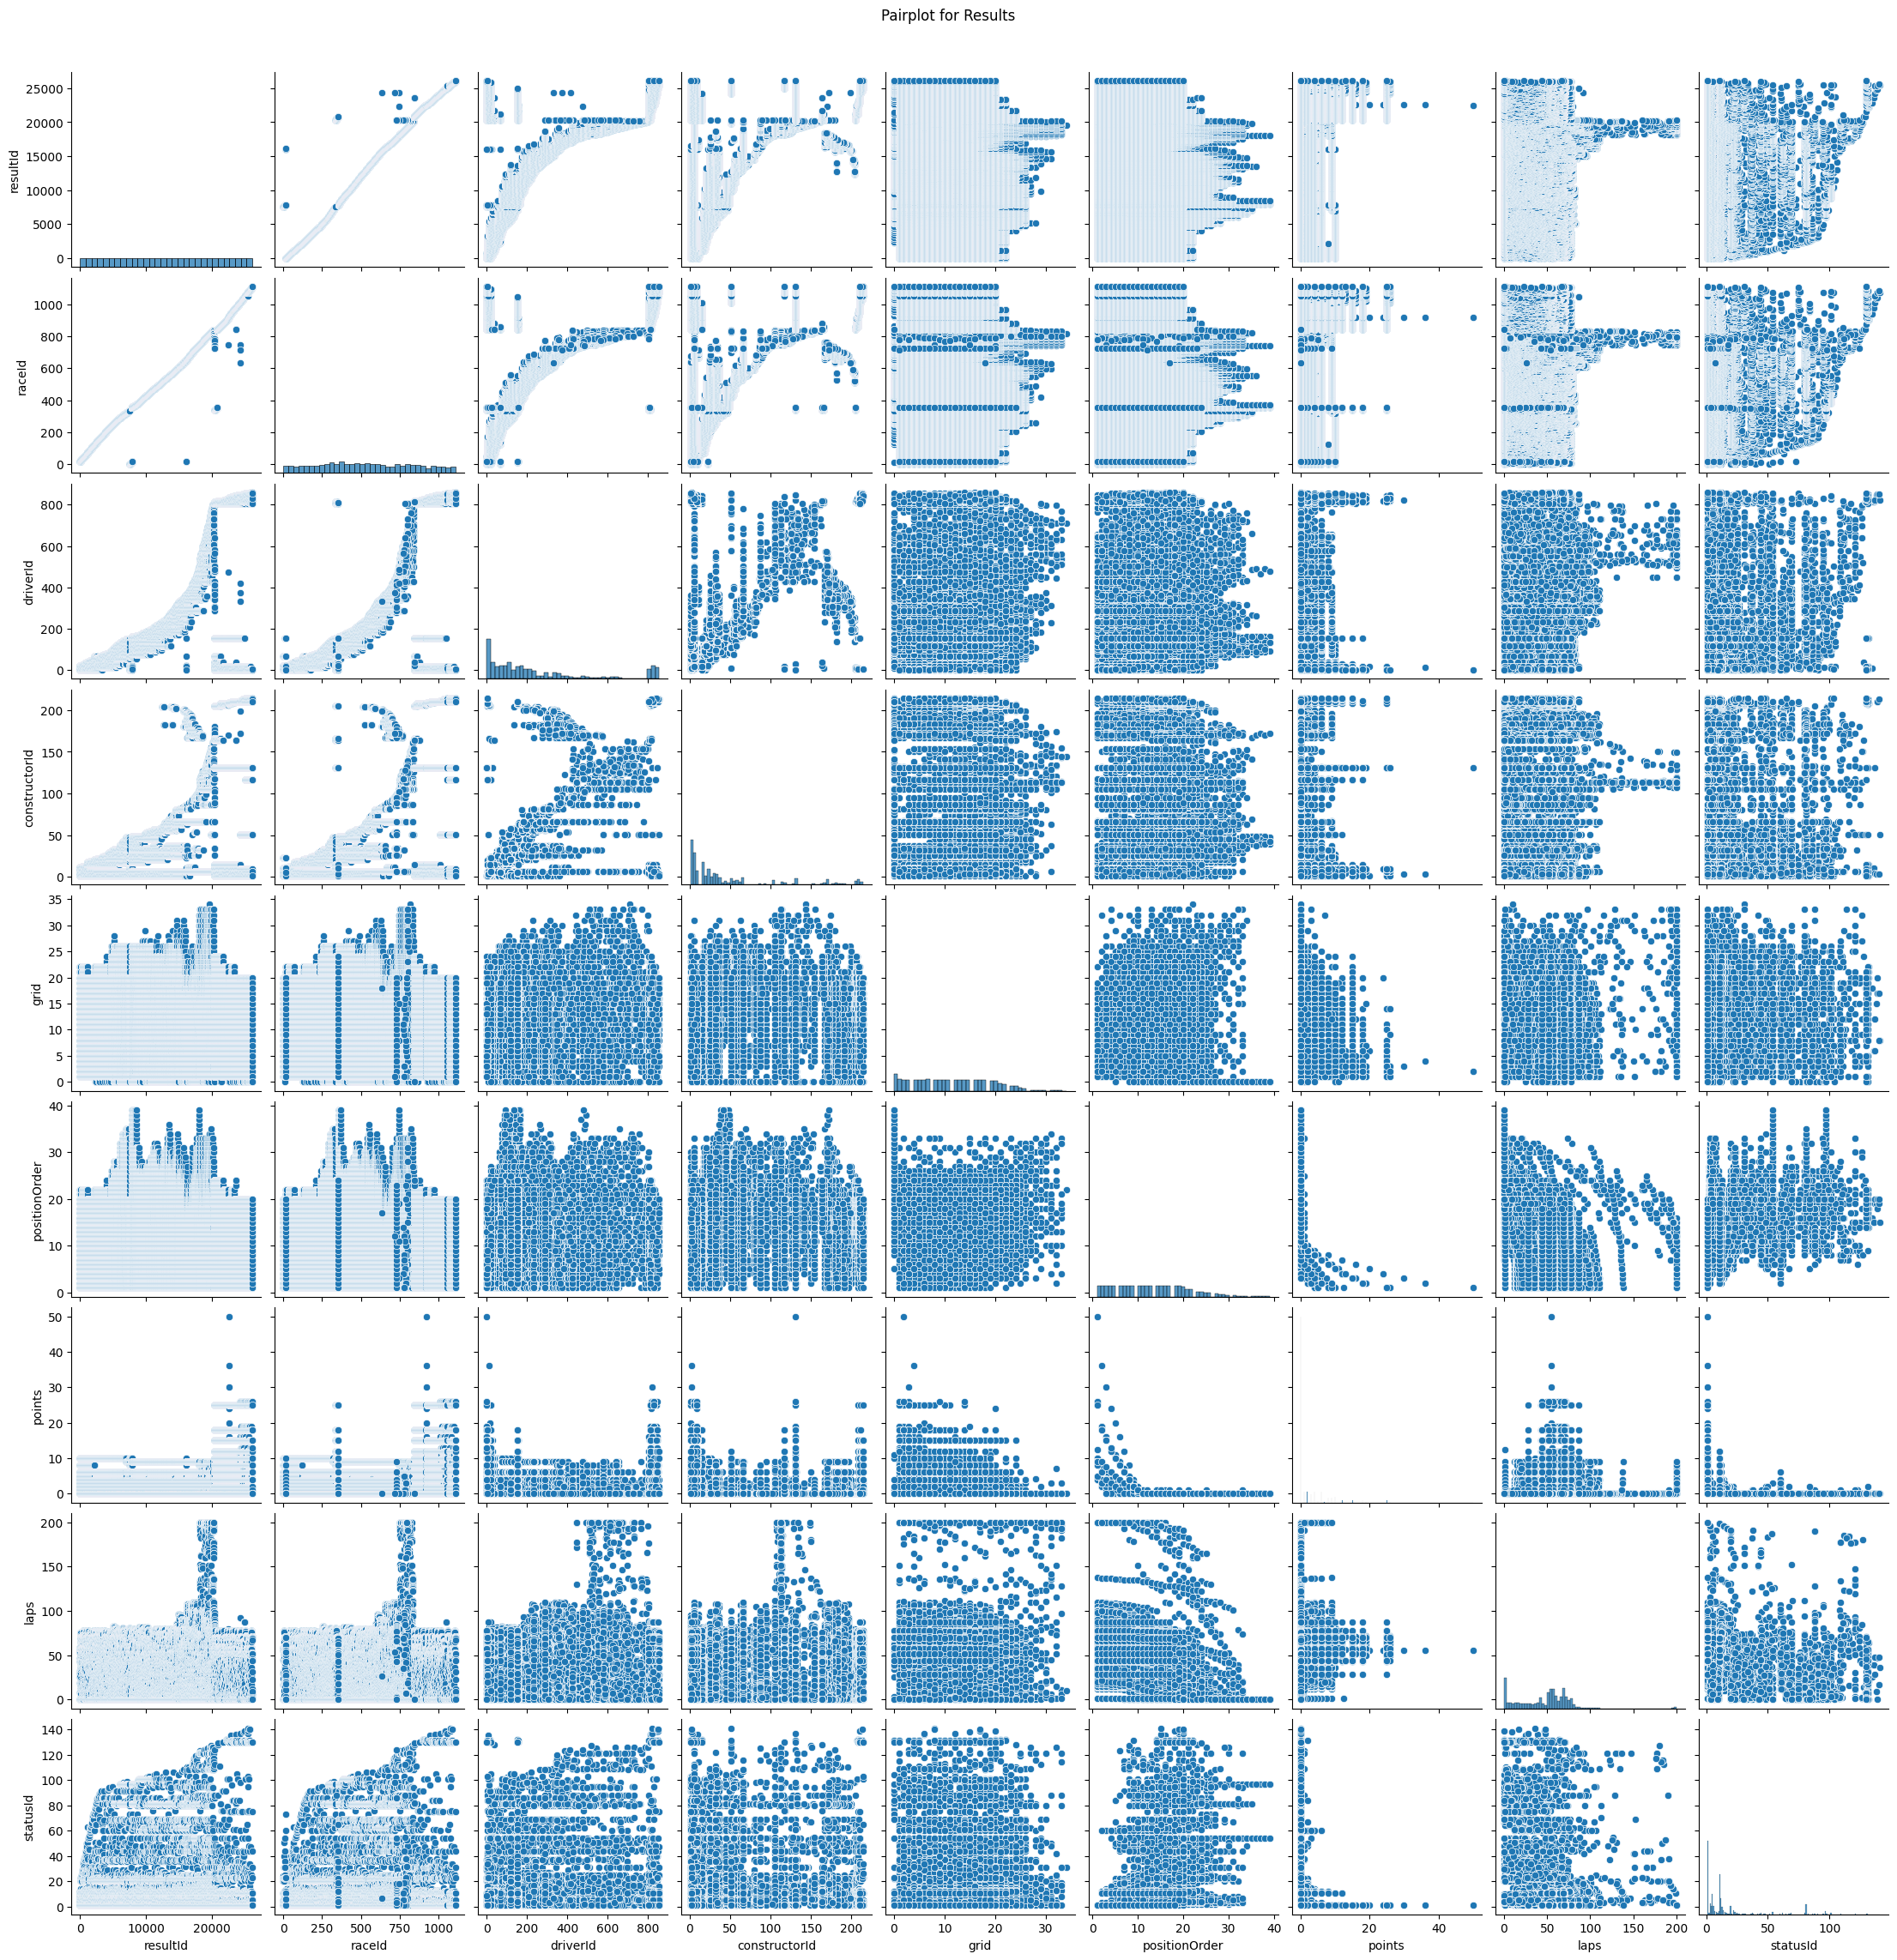

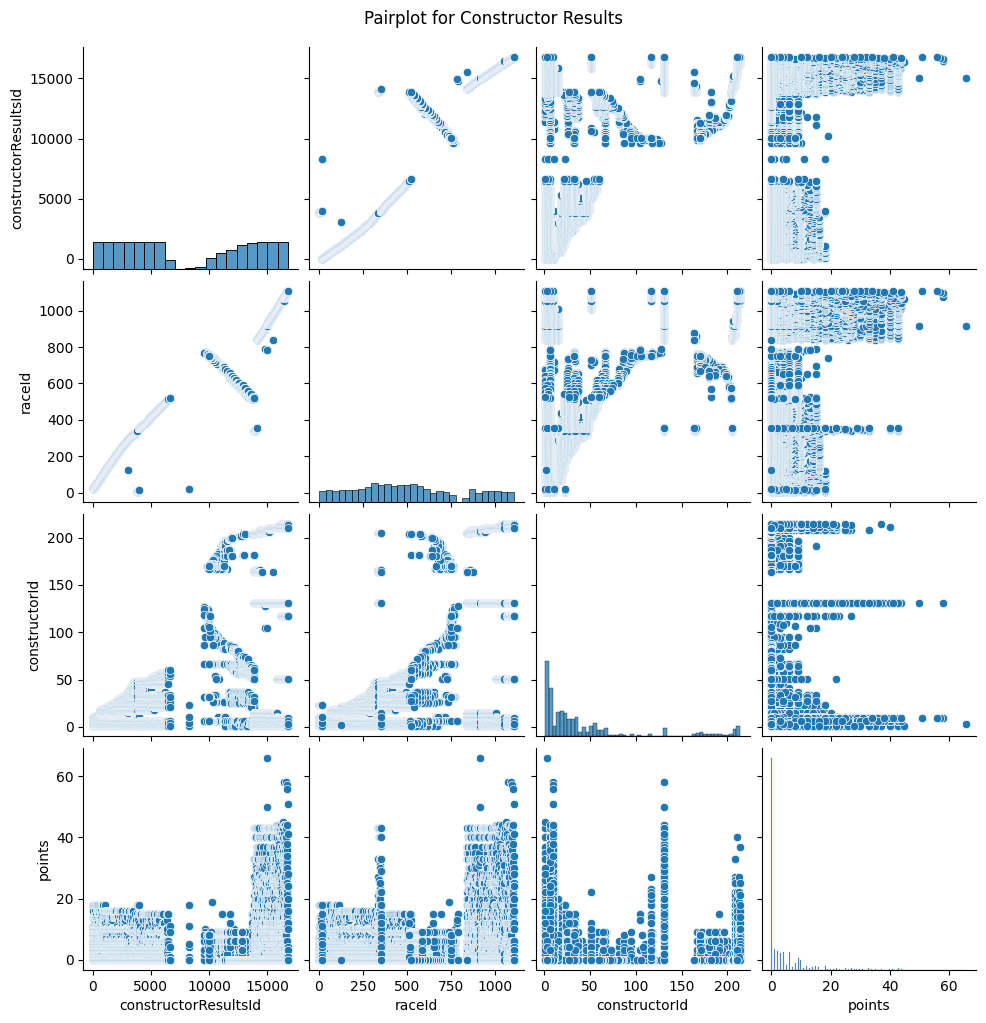

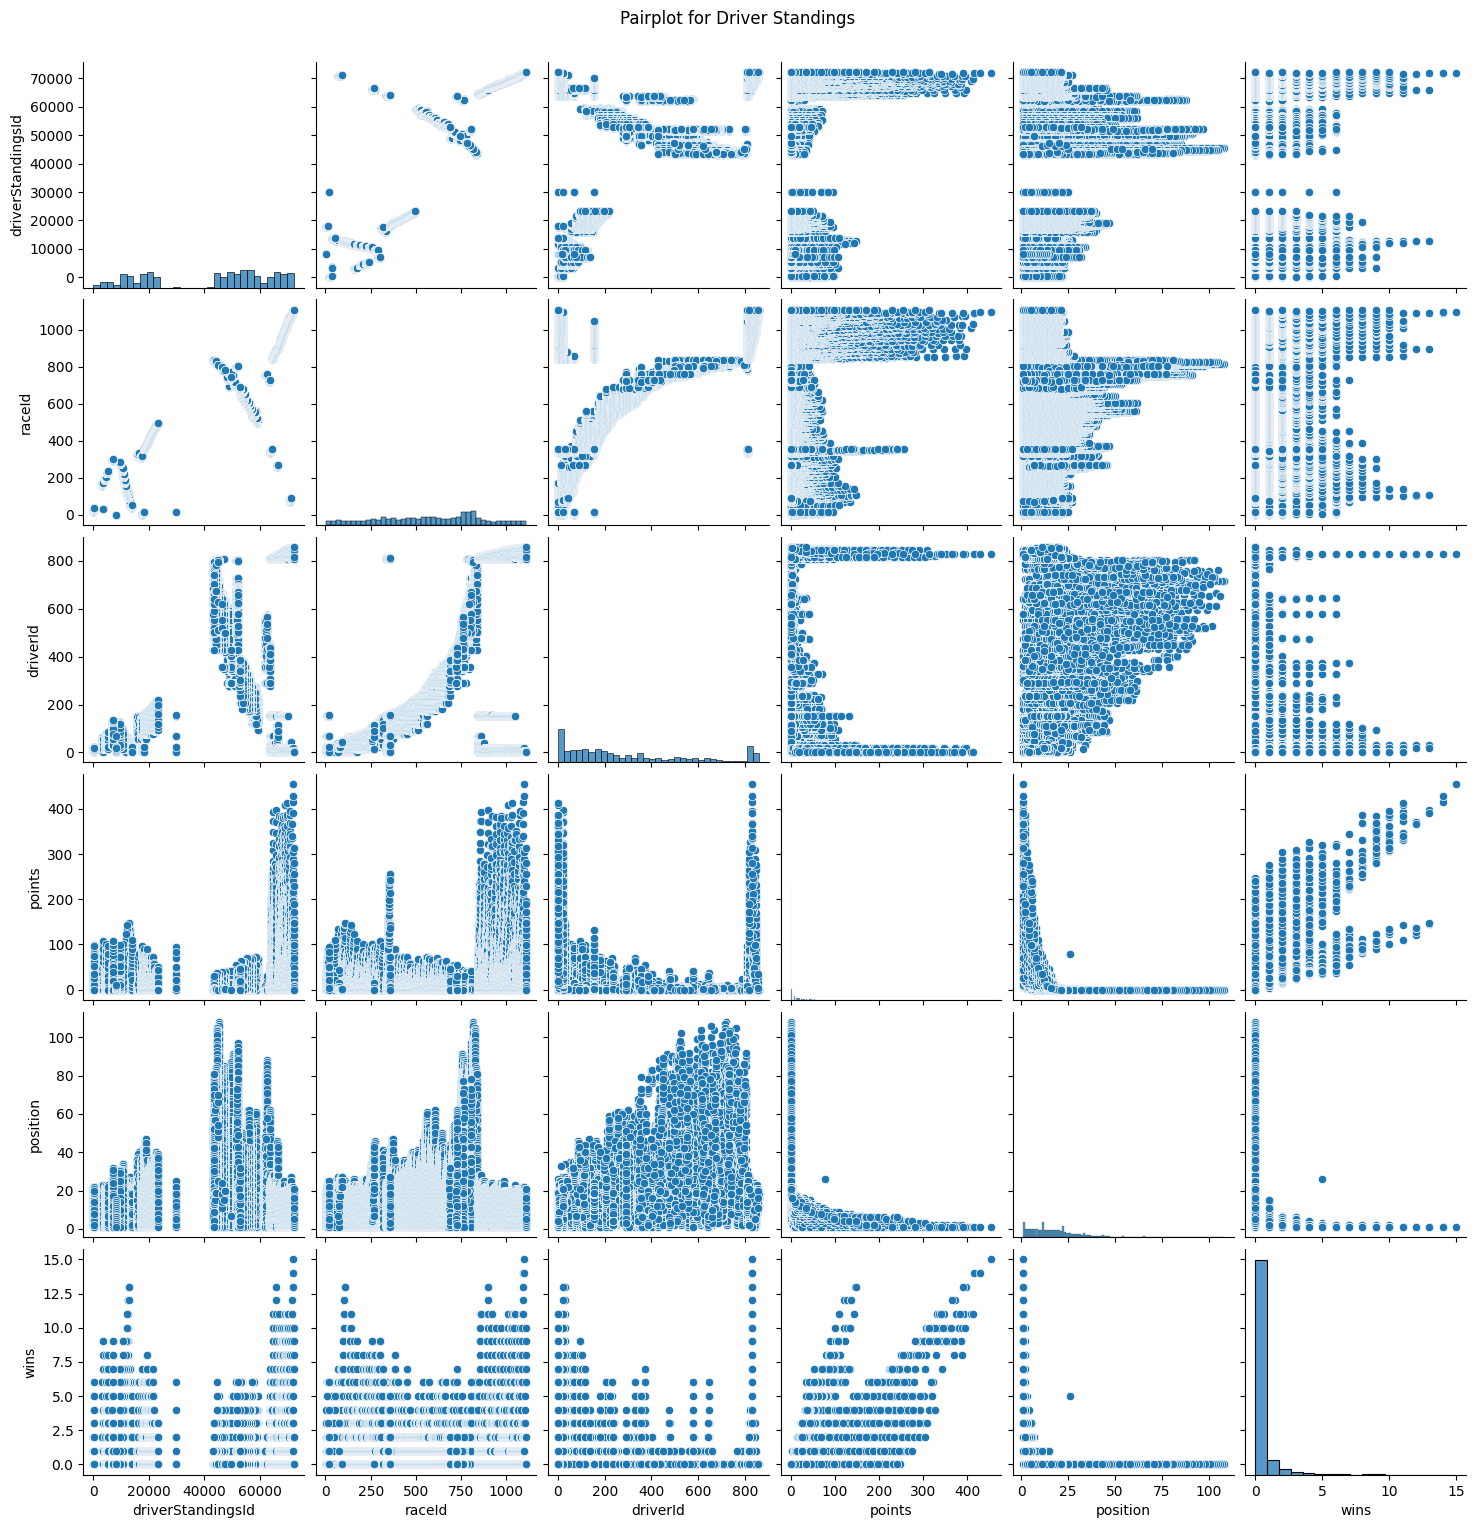

In [ ]:

results = dataframes['results']
constructor_results = dataframes['constructor_results']
driver_standings = dataframes['driver_standings']


# Pairplot for Results dataset
sns.pairplot(results)
plt.suptitle("Pairplot for Results", y=1.02)
plt.show()

# Pairplot for Constructor Results dataset
sns.pairplot(constructor_results)
plt.suptitle("Pairplot for Constructor Results", y=1.02)
plt.show()

# Pairplot for Driver Standings dataset
sns.pairplot(driver_standings)
plt.suptitle("Pairplot for Driver Standings", y=1.02)
plt.show()


Hypothesis 1: Relationship b/w constructor and race wins
- using result & consturctor data
- filter wins to top 1(positionOrder)
- count wins by constructor grouping by constructorID
- merge with constructor dataset to have constructor_wins_details
- print to check the summary stats


Summary Statistics of Constructor Wins:

count     47.000000
mean      23.276596
std       49.312536
min        1.000000
25%        1.000000
50%        4.000000
75%       14.500000
max      243.000000
Name: wins, dtype: float64


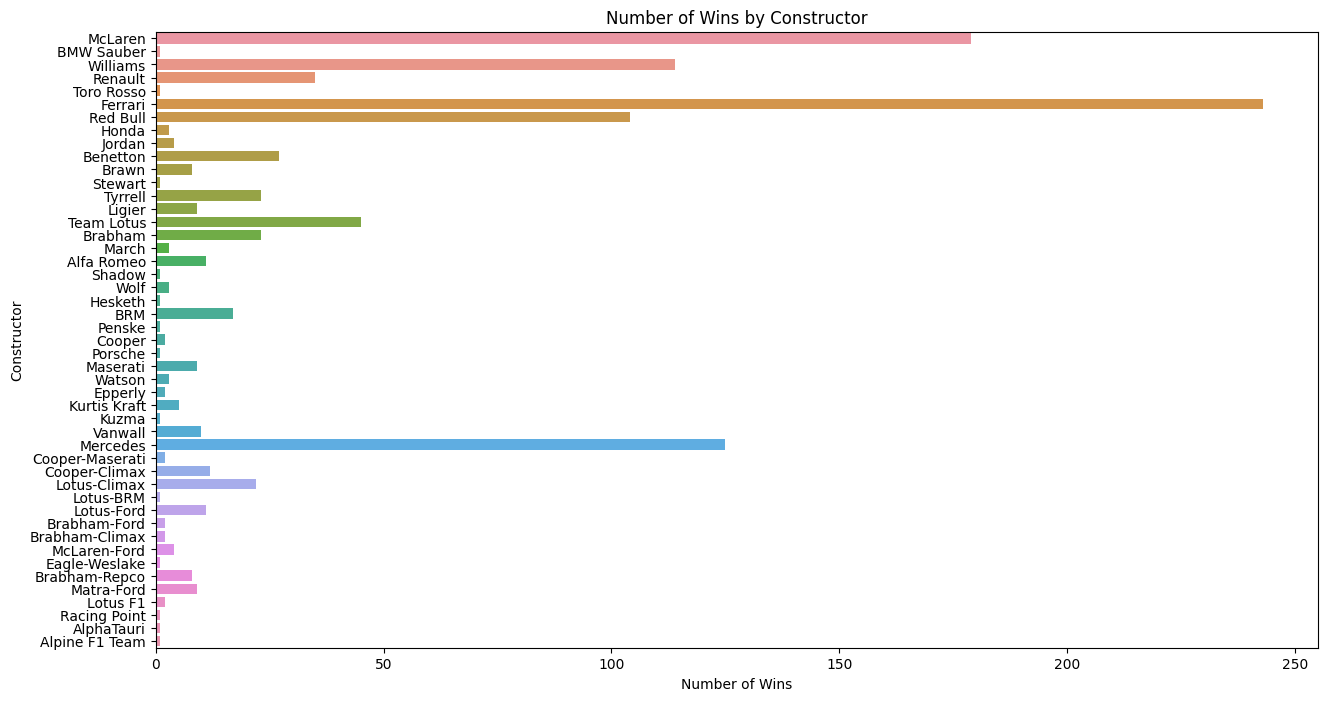

In [ ]:
# use 'resultd', 'constructors' dataset to evaluate 
#relationship b/w constructor and race wins

# Load datasets
results = dataframes['results']
constructors = dataframes['constructors']

# Filter wins (positionOrder = 1)
wins = results[results['positionOrder'] == 1]

# Count wins by constructor
constructor_wins = wins.groupby('constructorId').size().reset_index(name='wins')

# Merge with constructors dataset to get constructor names
constructor_wins_details = constructor_wins.merge(constructors, on='constructorId')

# Display the merged DataFrame
#print("Constructor Wins Details:\n")
#print(constructor_wins_details)

# Summary statistics of constructor wins
print("\nSummary Statistics of Constructor Wins:\n")
print(constructor_wins_details['wins'].describe())

#print("Constructor Wins Details:\n", constructor_wins_details.head())

# Visualize the constructor wins
plt.figure(figsize=(15, 8))
sns.barplot(x='wins', y='name', data=constructor_wins_details)
plt.title('Number of Wins by Constructor')
plt.xlabel('Number of Wins')
plt.ylabel('Constructor')
plt.show()

# constructor_wins_details_head, constructor_wins_stats

Hypothesis 2: efficiency/effectiveness of pit stops
- correlation b/w pit stop times & race performance
- use results and pit_stops data
- avg pit stop duration
- merge this with race data to get race perfomance
- correlation (using .corr)
- display df

Correlation between Average Pit Stop Duration and Race Position Order:
 -0.04309047482841836


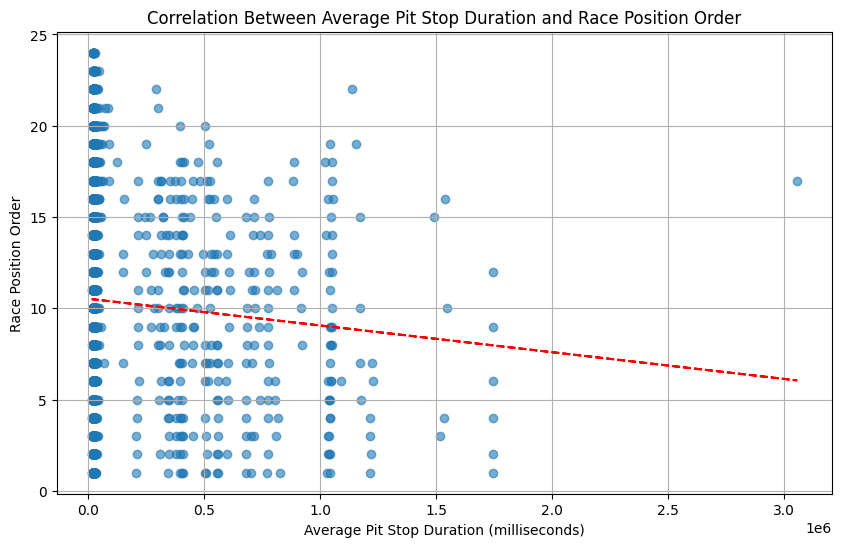

   resultId  raceId  driverId  constructorId number  grid position  \
0     20779     841        20              9      1     1        1   
1     20780     841         1              1      3     2        2   
2     20781     841       808              4     10     6        3   
3     20782     841         4              6      5     5        4   
4     20783     841        17              9      2     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    25.0    58  1:29:30.259      5370259   
1            2              2    18.0    58      +22.297      5392556   
2            3              3    15.0    58      +30.560      5400819   
3            4              4    12.0    58      +31.772      5402031   
4            5              5    10.0    58      +38.171      5408430   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  \
0         44    4       1:29.844         212.488         1   
1         41    

In [ ]:

# Load datasets
pit_stops = dataframes['pit_stops']
results = dataframes['results']

# Calculate average pit stop duration per race and driver
avg_pit_stop_duration = pit_stops.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index(name='avg_pit_stop_duration')

# Merge with results to get race performance
performance = results.merge(avg_pit_stop_duration, on=['raceId', 'driverId'])

# Correlation between pit stop duration and positionOrder
correlation = performance['avg_pit_stop_duration'].corr(performance['positionOrder'])
print("Correlation between Average Pit Stop Duration and Race Position Order:\n", correlation)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(performance['avg_pit_stop_duration'], performance['positionOrder'], alpha=0.6)
plt.title('Correlation Between Average Pit Stop Duration and Race Position Order')
plt.xlabel('Average Pit Stop Duration (milliseconds)')
plt.ylabel('Race Position Order')

# Calculate and plot trendline
import numpy as np
z = np.polyfit(performance['avg_pit_stop_duration'], performance['positionOrder'], 1)
p = np.poly1d(z)
plt.plot(performance['avg_pit_stop_duration'], p(performance['avg_pit_stop_duration']), "r--")

plt.grid(True)
plt.show()

# Display head of the performance DataFrame
#print("Performance DataFrame:\n")
print(performance.head())


In [ ]:
# import numpy as np

# # Get feature importances
# importances = rf_model.feature_importances_

# # Create a DataFrame for feature importances
# feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# # Sort by importance
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# # Plot feature importances
# plt.figure(figsize=(5, 2))
# sns.barplot(x='importance', y='feature', data=feature_importances)
# plt.title("Feature Importance in Random Forest")
# plt.show()


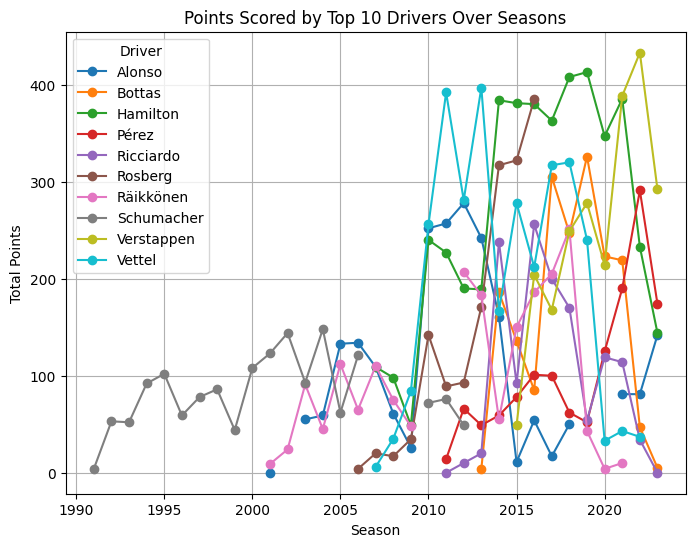

In [ ]:

races = dataframes['races']
drivers = dataframes['drivers']

# Aggregate points per season for each driver
driver_season_points = results.merge(races[['raceId', 'year']], on='raceId').groupby(['driverId', 'year'])['points'].sum().reset_index()

# Merge with drivers dataset to get driver names
driver_season_points = driver_season_points.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Determine the top 10 drivers by total points
top_10_drivers = driver_season_points.groupby('driverId')['points'].sum().reset_index().sort_values(by='points', ascending=False).head(10)

# Filter results for the top 10 drivers
top_10_driver_results = driver_season_points[driver_season_points['driverId'].isin(top_10_drivers['driverId'])]

# Create a pivot table for plotting
driver_season_pivot = top_10_driver_results.pivot(index='year', columns='surname', values='points')

# Plot the data
plt.figure(figsize=(8, 6))
driver_season_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Points Scored by Top 10 Drivers Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Driver')
plt.grid(True)
plt.show()


Drver performance by constructor
- Aggregate Data: Calculate the total points scored by each driver per constructor.
- Merge aggregated data with the drivers and constructors datasets for names
- Filter Top 10 Drivers by total points
- Plot Data: bar plot to show the points scored by drivers for each constructor.

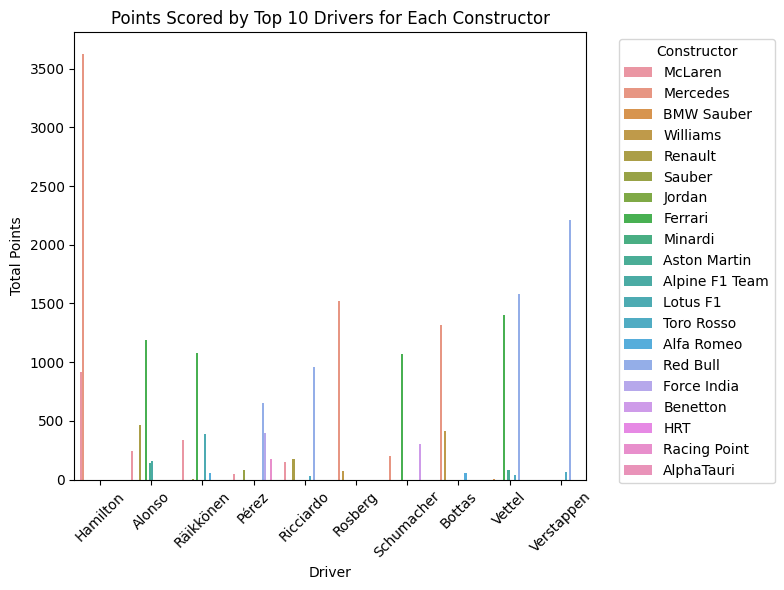

In [ ]:


# Aggregate points for each driver and constructor
driver_constructor_points = results.groupby(['driverId', 'constructorId'])['points'].sum().reset_index()

# Merge with drivers dataset to get driver names
driver_constructor_points = driver_constructor_points.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Merge with constructors dataset to get constructor names
driver_constructor_points = driver_constructor_points.merge(constructors[['constructorId', 'name']], on='constructorId')

# Determine the top 10 drivers by total points
top_10_drivers = driver_constructor_points.groupby('driverId')['points'].sum().reset_index().sort_values(by='points', ascending=False).head(10)

# Filter results for the top 10 drivers
top_10_driver_constructor_points = driver_constructor_points[driver_constructor_points['driverId'].isin(top_10_drivers['driverId'])]

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x='surname', y='points', hue='name', data=top_10_driver_constructor_points)
plt.title('Points Scored by Top 10 Drivers for Each Constructor')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Linear regression

In [ ]:

# Calculate the total number of races for each driver
driver_races = results.groupby('driverId')['raceId'].count().reset_index()
driver_races.rename(columns={'raceId': 'total_races'}, inplace=True)

# Calculate the total number of wins for each driver
driver_wins = results[results['positionOrder'] == 1].groupby('driverId')['raceId'].count().reset_index()
driver_wins.rename(columns={'raceId': 'total_wins'}, inplace=True)

# Merge total races and total wins dataframes
driver_performance = driver_races.merge(driver_wins, on='driverId', how='left')
driver_performance['total_wins'].fillna(0, inplace=True)  # Fill NaNs with 0 for drivers with no wins

# Calculate win rate
driver_performance['win_rate'] = driver_performance['total_wins'] / driver_performance['total_races']

# Merge with drivers dataset to get driver details
driver_performance = driver_performance.merge(drivers[['driverId', 'forename', 'surname', 'dob']], on='driverId')

# Calculate the current age of each driver
driver_performance['dob'] = pd.to_datetime(driver_performance['dob'])
driver_performance['age'] = 2024 - driver_performance['dob'].dt.year

# Select relevant features for the regression model
features = ['total_races', 'total_wins', 'age']
target = 'win_rate'


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = driver_performance[features]
y = driver_performance[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 0.0016333353788147344
R-squared: 0.45004525231660875

Model Coefficients:

             Coefficient
total_races     0.000011
total_wins      0.004808
age             0.000182


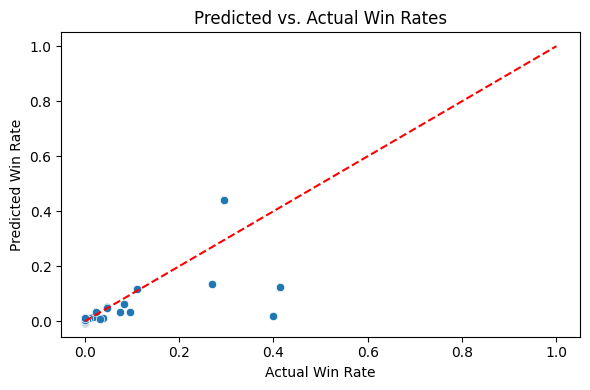

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predict win rates for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\nModel Coefficients:\n")
print(coefficients)

# Plot predictions vs. actual values

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs. Actual Win Rates')
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.tight_layout()
plt.show()



Mean Squared Error: 0.0016333353788147344
R-squared: 0.45004525231660875

Model Coefficients:

             Coefficient
total_races     0.000011
total_wins      0.004808
age             0.000182


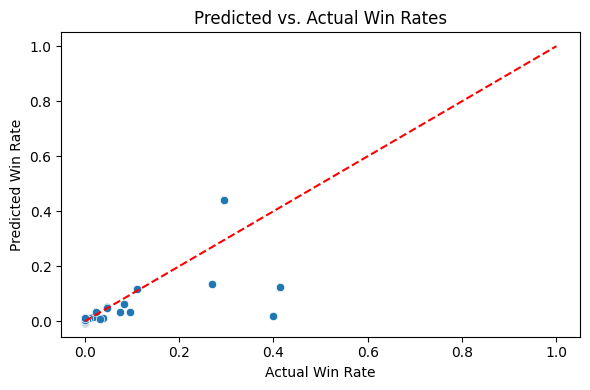

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
results = dataframes['results']
drivers = dataframes['drivers']

# Calculate the total number of races for each driver
driver_races = results.groupby('driverId')['raceId'].count().reset_index()
driver_races.rename(columns={'raceId': 'total_races'}, inplace=True)

# Calculate the total number of wins for each driver
driver_wins = results[results['positionOrder'] == 1].groupby('driverId')['raceId'].count().reset_index()
driver_wins.rename(columns={'raceId': 'total_wins'}, inplace=True)

# Merge total races and total wins dataframes
driver_performance = driver_races.merge(driver_wins, on='driverId', how='left')
driver_performance['total_wins'].fillna(0, inplace=True)  # Fill NaNs with 0 for drivers with no wins

# Calculate win rate
driver_performance['win_rate'] = driver_performance['total_wins'] / driver_performance['total_races']

# Merge with drivers dataset to get driver details
driver_performance = driver_performance.merge(drivers[['driverId', 'forename', 'surname', 'dob']], on='driverId')

# Calculate the current age of each driver
driver_performance['dob'] = pd.to_datetime(driver_performance['dob'])
driver_performance['age'] = 2024 - driver_performance['dob'].dt.year

# Select relevant features for the regression model
features = ['total_races', 'total_wins', 'age']
target = 'win_rate'

# Split the data into training and testing sets
X = driver_performance[features]
y = driver_performance[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict win rates for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\nModel Coefficients:\n")
print(coefficients)

# Plot predictions vs. actual values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs. Actual Win Rates')
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.tight_layout()
plt.show()


Decision Model

grid                int64
laps                int64
milliseconds       object
fastestLapSpeed    object
dtype: object
Accuracy: 0.96
Precision: 0.39
Recall: 0.03
Confusion Matrix:
[[7466   14]
 [ 335    9]]


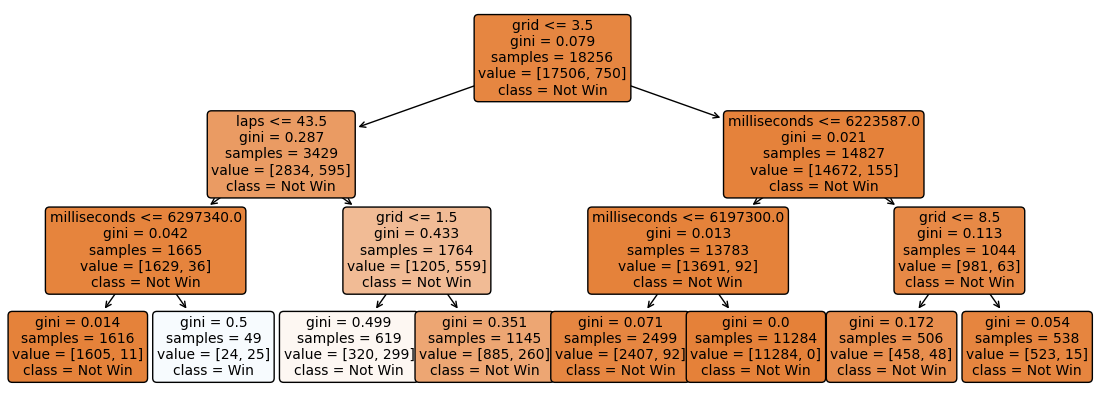

In [16]:

# # Load datasets
# results = dataframes['results']
# constructors = dataframes['constructors']

# # Filter wins (positionOrder = 1)
# results['win'] = results['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

# # Merge with constructors dataset to get constructor names
# data = results.merge(constructors, on='constructorId')

# # Check the data
# data.head()

# #Feature Engineering
# # Selecting relevant features for the model
# features = ['grid', 'laps', 'milliseconds', 'fastestLapSpeed']
# target = 'win'

# # Prepare the feature matrix (X) and target vector (y)
# X = data[features]
# y = data[target]

# #3. Split the Data
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# #4. Train the Model
# from sklearn.tree import DecisionTreeClassifier

# # Train Decision Tree classifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# #5. Evaluate the Model
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix)

# # Summary
# # Load and Prepare the Data: Merge datasets and create a target variable for race wins.
# # Feature Engineering: Select relevant features for the model.
# # Split the Data: Split into training and testing sets.
# # Train the Model: Train a Decision Tree classifier.
# # Evaluate the Model: Assess model performance using accuracy, precision, recall, and confusion matrix.
# # This simple decision modeling process will help you predict race wins based on historical data.


# #6. Visualize the Decision Tree
# from sklearn.tree import plot_tree

# # Plot the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=features, class_names=['Not Win', 'Win'], filled=True, rounded=True, fontsize=10)
# plt.show()

####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load datasets
results = dataframes['results']
constructors = dataframes['constructors']

# Filter wins (positionOrder = 1)
results['win'] = results['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

# Merge with constructors dataset to get constructor names
data = results.merge(constructors, on='constructorId')

# Select relevant features for the model (feature engineering)
features = ['grid', 'laps', 'milliseconds', 'fastestLapSpeed']
target = 'win'

# Check for non-numeric values in the feature columns
print(data[features].dtypes)

# Convert columns to numeric and handle missing values
for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# Handle missing values by filling with the mean
data[features] = data[features].fillna(data[features].mean())

# Prepare the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#** Set maximum depth for easy viz
max_depth = 3  #value can be adjusted to make the tree simpler or more complex

# Train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot the decision tree
plt.figure(figsize=(14, 5))
plot_tree(model, feature_names=features, class_names=['Not Win', 'Win'], filled=True, rounded=True, fontsize=10)
plt.show()


Random Forest

In [ ]:
# Load datasets
results = dataframes['results']
constructors = dataframes['constructors']

# Filter wins (positionOrder = 1)
results['win'] = results['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

# Merge with constructors dataset to get constructor names
data = results.merge(constructors, on='constructorId')

# Select relevant features for the model
features = ['grid', 'laps', 'milliseconds', 'fastestLapSpeed']
target = 'win'

# Convert 'milliseconds' and 'fastestLapSpeed' to numeric types
data['milliseconds'] = pd.to_numeric(data['milliseconds'], errors='coerce')
data['fastestLapSpeed'] = pd.to_numeric(data['fastestLapSpeed'], errors='coerce')

# Handle missing values by filling with the mean
data = data.dropna(subset=features)
data[features] = data[features].fillna(data[features].mean())

# Prepare the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

#Step 2: Split the Data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Step 3: Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

#Step 4: Evaluate the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')
print(f'Precision (Random Forest): {precision_rf:.2f}')
print(f'Recall (Random Forest): {recall_rf:.2f}')
print('Confusion Matrix (Random Forest):')
print(conf_matrix_rf)

In [ ]:
END

NameError: name 'END' is not defined

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Sample data
# data = pd.DataFrame({
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1],
#     'C': [2, 3, 4, 5, 6]
# })

# # Compute the correlation matrix
# corr = data.corr()

# # Create a heatmap with annotations in all cells
# plt.figure(figsize=(10, 8))
# heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# # Set the title
# plt.title('Correlation Matrix with Annotations')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
})

# Compute the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})

# Add the correlation values manually
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j+0.5, i+0.5, f'{corr.iloc[i, j]:.2f}',
                ha='center', va='center', color='black')

# Set the title
plt.title('Correlation Matrix with Annotations')
plt.show()

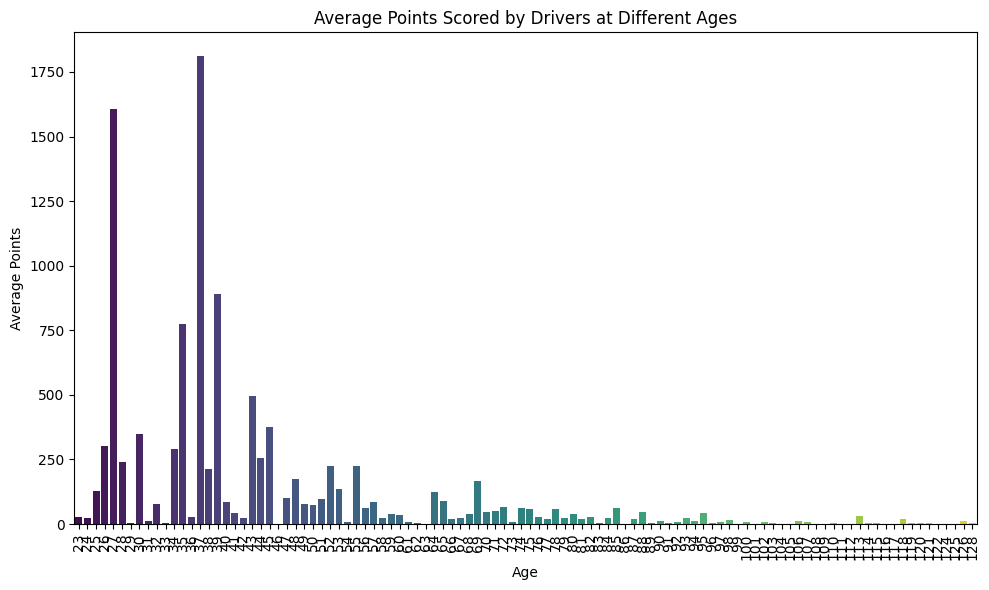

In [ ]:
# Aggregate points for driver
driver_points = results.groupby('driverId')['points'].sum().reset_index()

# Merge with drivers dataset to get driver details
driver_points = driver_points.merge(drivers[['driverId', 'dob']], on='driverId')

# Calculate the current age of each driver
driver_points['dob'] = pd.to_datetime(driver_points['dob'])
driver_points['age'] = 2024 - driver_points['dob'].dt.year

# Group by age and calculate the mean points scored
age_performance = driver_points.groupby('age')['points'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='points', data=age_performance, palette='viridis')
plt.title('Average Points Scored by Drivers at Different Ages')
plt.xlabel('Age')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
